In [1]:
import torch 
from cbsmodel import ConvergentBornSeries
import matplotlib.pyplot as plt

import sys 
sys.path.append('../')
from linearops import CBSOperator
from dataset import inhomo_helmholtz_2d
from utils import relative_l2

In [2]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device = 'cpu'
sos = None # torch.ones((128,128)) * 5
model = ConvergentBornSeries(lamb=1,
                             sos=sos,# default homogenous, sound of speed
                             dx=None,
                             src_loc=[100,40],
                             boundary_width=[8,8],
                             boundary_strength=1,
                             boundary_type='PML3', 
                             dtype=torch.float64).to(device)
model.solve(maxiter=10000, tol=1e-14)

0 - diff norm : 1.5752e-02
1000 - diff norm : 3.8964e-04
2000 - diff norm : 9.0448e-05
3000 - diff norm : 2.3932e-05
4000 - diff norm : 6.3877e-06
5000 - diff norm : 1.7765e-06
6000 - diff norm : 4.8458e-07
7000 - diff norm : 1.3762e-07
8000 - diff norm : 3.8517e-08
9000 - diff norm : 1.0825e-08


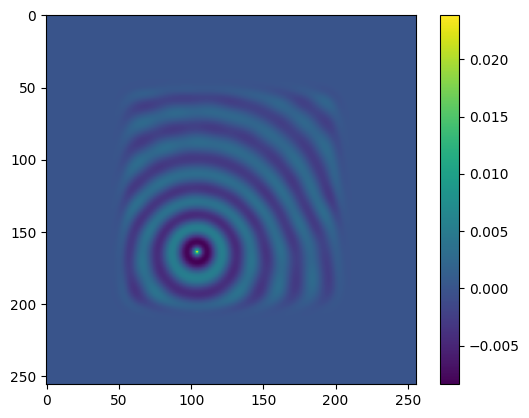

In [3]:
plt.imshow(model.u.real)
plt.colorbar()

In [16]:
data = inhomo_helmholtz_2d(torch.float64)
lops = CBSOperator(gamma=data['gamma'], V=data['V'], g0=data['g0'])

0 - diff norm : 5.7140e-03
1000 - diff norm : 3.7865e-07
2000 - diff norm : 7.0857e-10
3000 - diff norm : 1.3555e-12
meet tol 1.0000e-14


In [8]:
upred = lops.map(data['uTrain'])
uref = data['uTrain']

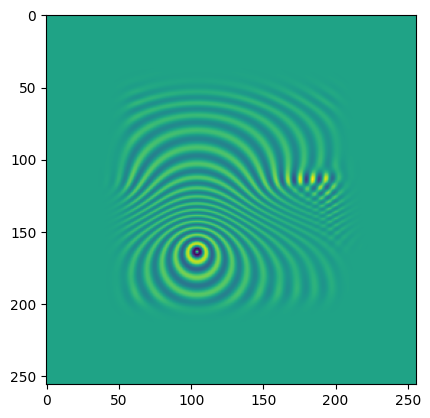

In [9]:
plt.imshow(model.u.real)

In [4]:
relative_l2(upred, uref)
relative_l2(lops.map(data['u']), data['u'])

tensor(5.2019e-14)

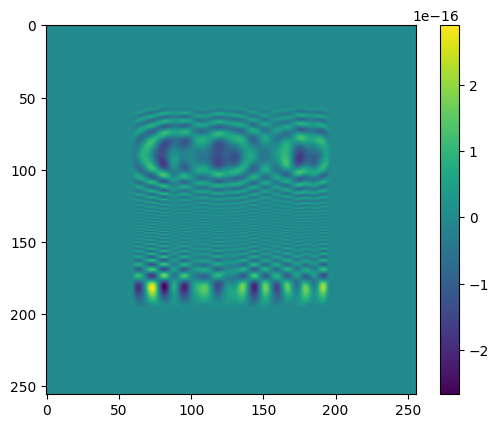

In [5]:
plt.imshow((upred-data['u']).real)
plt.colorbar()